In [119]:
import crds
import os
import asdf
os.environ["CRDS_PATH"] = "/orange/adamginsburg/jwst/brick/crds/"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [120]:
from jwst.outlier_detection import OutlierDetectionStep
from jwst import datamodels
import numpy as np

In [121]:
regionname = 'brick'
filtername = 'f2550w'
mapping = crds.rmap.load_mapping(f'/orange/adamginsburg/jwst/{regionname}/crds/mappings/jwst/jwst_miri_pars-tweakregstep_0003.rmap')
print(f"Mapping: {mapping.todict()['selections']}")
print(f"Filtername: {filtername}")
filter_match = [x for x in mapping.todict()['selections'] if filtername.upper() in x]
print(f"Filter_match: {filter_match} n={len(filter_match)}")
print(f"Filter_match: {filter_match} n={len(filter_match)}")
tweakreg_asdf_filename = filter_match[0][3]
tweakreg_asdf = asdf.open(f'https://jwst-crds.stsci.edu/unchecked_get/references/jwst/{tweakreg_asdf_filename}')
tweakreg_parameters = tweakreg_asdf.tree['parameters']

Mapping: [('MIR_IMAGE', 'F1000W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0015.asdf'), ('MIR_IMAGE', 'F1130W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0016.asdf'), ('MIR_IMAGE', 'F1280W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0012.asdf'), ('MIR_IMAGE', 'F1500W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0014.asdf'), ('MIR_IMAGE', 'F1800W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0013.asdf'), ('MIR_IMAGE', 'F2100W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0011.asdf'), ('MIR_IMAGE', 'F2550W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0018.asdf'), ('MIR_IMAGE', 'F2550WR', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0020.asdf'), ('MIR_IMAGE', 'F560W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0019.asdf'), ('MIR_IMAGE', 'F770W', '2000-01-01 00:00:00', 'jwst_miri_pars-tweakregstep_0017.asdf')]
Filtername: f2550w
Filter_match: [('MIR_IMAGE', 'F2550W', '2000-01-01 00:00:00', 'jwst_miri_pars-twea

In [122]:
filter_match[0]

('MIR_IMAGE',
 'F2550W',
 '2000-01-01 00:00:00',
 'jwst_miri_pars-tweakregstep_0018.asdf')

In [123]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline'

In [124]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [125]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [126]:
ls -lhrt F2550W/pipeline/jw02221002001_02101_00001_mirimage*

-rw-r--r-- 1 adamginsburg adamginsburg  56M May  5 20:08 F2550W/pipeline/jw02221002001_02101_00001_mirimage_uncal.fits
-rw-r--r-- 1 adamginsburg adamginsburg  29M May  7 19:07 F2550W/pipeline/jw02221002001_02101_00001_mirimage_align_o002_crf.fits
-rw-r--r-- 1 adamginsburg adamginsburg  29M Aug  4 16:18 F2550W/pipeline/jw02221002001_02101_00001_mirimage_o002_outlierdetectionstep.fits
-rw-r--r-- 1 adamginsburg adamginsburg  29M Aug  4 16:34 F2550W/pipeline/jw02221002001_02101_00001_mirimage_align.fits
-rw-r--r-- 1 adamginsburg adamginsburg 230M Aug  4 16:46 F2550W/pipeline/jw02221002001_02101_00001_mirimage_ramp.fits
-rw-r--r-- 1 adamginsburg adamginsburg  41M Aug  4 16:46 F2550W/pipeline/jw02221002001_02101_00001_mirimage_rateints.fits
-rw-r--r-- 1 adamginsburg adamginsburg  21M Aug  4 16:46 F2550W/pipeline/jw02221002001_02101_00001_mirimage_rate.fits
-rw-r--r-- 1 adamginsburg adamginsburg  29M Aug  4 16:46 F2550W/pipeline/jw02221002001_02101_00001_mirimage_i2d.fits
-rw-r--r-- 1 adamgin

In [127]:
from astropy.io import fits

In [128]:
import glob

In [129]:
for fn in glob.glob(f'{basepath}/F2550W/pipeline/jw02221002001_02101_00001_mirimage*.fits'):
    hdr = fits.getheader(fn, ext=1)
    if 'BKGSUB' in hdr or 'BKGLEVEL' in hdr:
        print(fn)

In [130]:
import json

In [131]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [132]:
with open(f'{basepath}/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json') as fh:
    asn = json.load(fh)

In [133]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [134]:
cd $basepath/F2550W/pipeline/

/blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline


In [135]:
from jwst.skymatch import SkyMatchStep

skymatch = SkyMatchStep()
skymatch.skymethod = 'global+match' # global+match is the default. Set here as an example
skymatch.save_results = True
sky = skymatch.run(asn)

2024-08-04 17:23:25,927 - stpipe.SkyMatchStep - INFO - SkyMatchStep instance created.
2024-08-04 17:23:26,446 - stpipe.SkyMatchStep - INFO - Step SkyMatchStep running with args ({'asn_type': 'image3', 'asn_rule': 'candidate_Asn_Lv3Image', 'version_id': '20240708t040837', 'code_version': '1.14.0', 'degraded_status': 'No known degraded exposures in association.', 'program': '02221', 'constraints': 'DMSAttrConstraint({\'name\': \'program\', \'sources\': [\'program\'], \'value\': \'2221\'})\nDMSAttrConstraint({\'name\': \'instrument\', \'sources\': [\'instrume\'], \'value\': \'miri\'})\nDMSAttrConstraint({\'name\': \'opt_elem\', \'sources\': [\'filter\'], \'value\': \'f2550w\'})\nDMSAttrConstraint({\'name\': \'opt_elem2\', \'sources\': [\'pupil\', \'grating\'], \'value\': None})\nDMSAttrConstraint({\'name\': \'fxd_slit2\', \'sources\': [\'fxd_slit\'], \'value\': [\'s200a1|s200a2\']})\nDMSAttrConstraint({\'name\': \'fxd_slit\', \'sources\': [\'fxd_slit\'], \'value\': None})\nDMSAttrConstrai

In [136]:
meta = sky[0].meta
meta.filename

'step_SkyMatchStep_0_skymatchstep.fits'

In [137]:
sky_file = sky[2].meta.filename
sky_data = datamodels.open(sky_file)

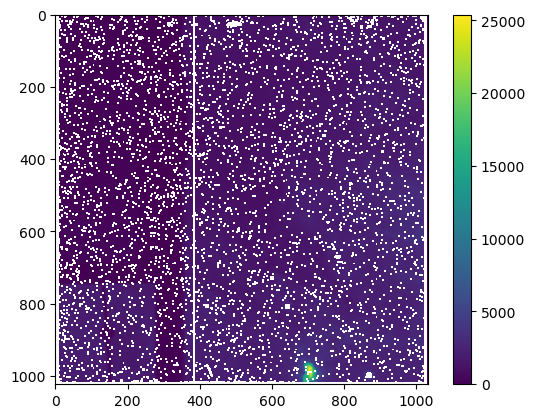

In [138]:
#pl.imshow(np.nan_to_num(sky_data.data)); pl.colorbar();
pl.imshow((sky_data.data)); pl.colorbar();

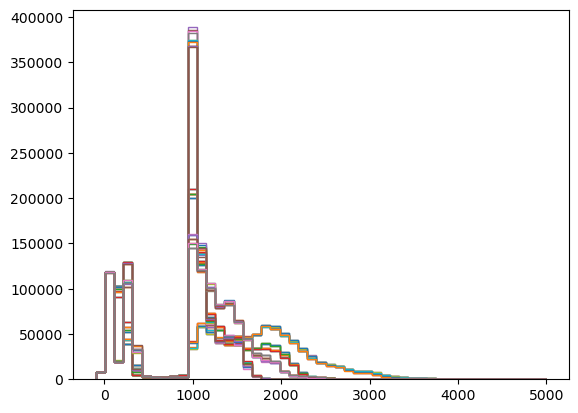

In [139]:
for ssky in sky:
    sky_file = ssky.meta.filename
    sky_data = datamodels.open(sky_file)
    pl.hist(sky_data.data.ravel(), bins=np.linspace(-100, 5000), histtype='step');

In [140]:
sky_file

'step_SkyMatchStep_47_skymatchstep.fits'

In [141]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [142]:
cd $basepath/F2550W/pipeline/

/blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline


In [143]:
with open(f'{basepath}/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json') as fh:
    asn = json.load(fh)

In [144]:
# Run the step
outlier_detection = OutlierDetectionStep()
outlier_detection.save_results = True
#outlier = outlier_detection.run(asn)
outlier = outlier_detection.run(sky)

2024-08-04 17:28:45,519 - stpipe.OutlierDetectionStep - INFO - OutlierDetectionStep instance created.
2024-08-04 17:28:46,155 - stpipe.OutlierDetectionStep - INFO - Step OutlierDetectionStep running with args (<ModelContainer>,).
2024-08-04 17:28:46,158 - stpipe.OutlierDetectionStep - INFO - Step OutlierDetectionStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: None
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: False
  input_dir: ''
  weight_type: ivm
  pixfrac: 1.0
  kernel: square
  fillval: INDEF
  nlow: 0
  nhigh: 0
  maskpt: 0.7
  snr: 5.0 4.0
  scale: 1.2 0.7
  backg: 0.0
  kernel_size: 7 7
  threshold_percent: 99.8
  rolling_window_width: 25
  ifu_second_check: False
  save_intermediate_results: False
  resample_data: True
  good_bits: ~DO_NOT_USE
  allowed_memory: None
  in_memory: False
2024-08-04 17:28:46,169 - stpipe.OutlierDetectionStep - IN

In [179]:
print(outlier_detection.spec)


        weight_type = option('ivm','exptime',default='ivm')
        pixfrac = float(default=1.0)
        kernel = string(default='square') # drizzle kernel
        fillval = string(default='INDEF')
        nlow = integer(default=0)  # DEPRECATED this setting has no effect and will be removed
        nhigh = integer(default=0)  # DEPRECATED this setting has no effect and will be removed
        maskpt = float(default=0.7)
        snr = string(default='5.0 4.0')
        scale = string(default='1.2 0.7')
        backg = float(default=0.0)
        kernel_size = string(default='7 7')
        threshold_percent = float(default=99.8)
        rolling_window_width = integer(default=25)
        ifu_second_check = boolean(default=False)
        save_intermediate_results = boolean(default=False)
        resample_data = boolean(default=True)
        good_bits = string(default="~DO_NOT_USE")  # DQ flags to allow
        search_output_file = boolean(default=False)
        allowed_memory = float(defau

In [145]:
outlier[0].meta.filename

'step_SkyMatchStep_0_o002_outlierdetectionstep.fits'

In [148]:
outlier_file = outlier[0].meta.filename
print(outlier_file)
outlier_data = datamodels.open(outlier_file)
# Get a list of pixels where DQ flags were changed
#cal_data = datamodels.open(outlier_file.replace("outlierdetectionstep", "cal"))
#new_flags = np.where(cal_data.dq != outlier_data.dq)
#print("Found {} pixels with updated DQ flag values.".format(len(new_flags[0])))

step_SkyMatchStep_0_o002_outlierdetectionstep.fits
Found 996552 pixels with updated DQ flag values.


In [149]:
outlier_file

'step_SkyMatchStep_0_o002_outlierdetectionstep.fits'

In [150]:
import pylab as pl

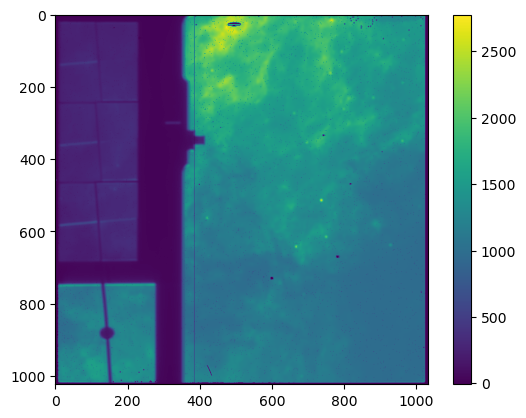

In [151]:
pl.imshow(np.nan_to_num(cal_data.data)); pl.colorbar();

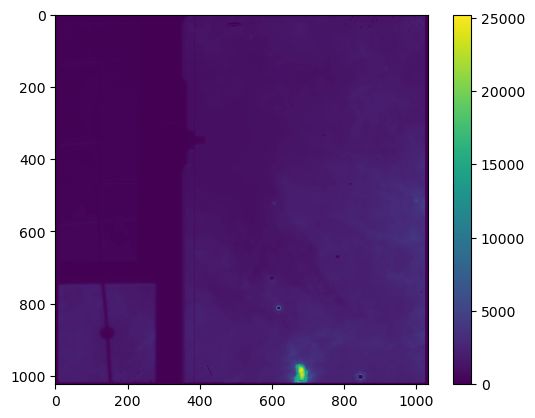

In [152]:
pl.imshow(np.nan_to_num(outlier_data.data)); pl.colorbar();

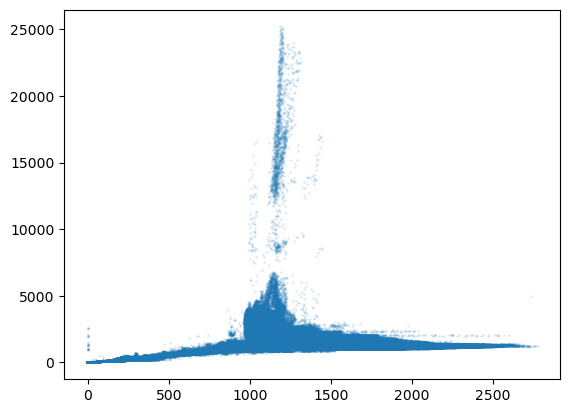

In [153]:
pl.scatter(cal_data.data, outlier_data.data, s=1, alpha=0.1)

In [154]:
outlier_file

'step_SkyMatchStep_0_o002_outlierdetectionstep.fits'

In [157]:
from jwst.resample import ResampleStep

In [158]:
outlier

<ModelContainer>

In [159]:
# Resample step may be the problem?
print(ResampleStep.spec)

resample = ResampleStep()
resample.save_results = True
resamp = resample.run(asn)

2024-08-04 17:39:43,149 - stpipe.ResampleStep - INFO - ResampleStep instance created.



        pixfrac = float(min=0.0, max=1.0, default=1.0)  # Pixel shrinkage factor
        kernel = option('square','gaussian','point','turbo','lanczos2','lanczos3',default='square')  # Flux distribution kernel
        fillval = string(default='NAN')  # Output value for pixels with no weight or flux
        weight_type = option('ivm', 'exptime', None, default='ivm')  # Input image weighting type
        output_shape = int_list(min=2, max=2, default=None)  # [x, y] order
        crpix = float_list(min=2, max=2, default=None)
        crval = float_list(min=2, max=2, default=None)
        rotation = float(default=None)  # Output image Y-axis PA relative to North
        pixel_scale_ratio = float(default=1.0)  # Ratio of input to output pixel scale
        pixel_scale = float(default=None)  # Absolute pixel scale in arcsec
        output_wcs = string(default='')  # Custom output WCS
        single = boolean(default=False)  # Resample each input to its own output grid
        blendheaders = 

2024-08-04 17:39:44,197 - stpipe.ResampleStep - INFO - Step ResampleStep running with args ({'asn_type': 'image3', 'asn_rule': 'candidate_Asn_Lv3Image', 'version_id': '20240708t040837', 'code_version': '1.14.0', 'degraded_status': 'No known degraded exposures in association.', 'program': '02221', 'constraints': 'DMSAttrConstraint({\'name\': \'program\', \'sources\': [\'program\'], \'value\': \'2221\'})\nDMSAttrConstraint({\'name\': \'instrument\', \'sources\': [\'instrume\'], \'value\': \'miri\'})\nDMSAttrConstraint({\'name\': \'opt_elem\', \'sources\': [\'filter\'], \'value\': \'f2550w\'})\nDMSAttrConstraint({\'name\': \'opt_elem2\', \'sources\': [\'pupil\', \'grating\'], \'value\': None})\nDMSAttrConstraint({\'name\': \'fxd_slit2\', \'sources\': [\'fxd_slit\'], \'value\': [\'s200a1|s200a2\']})\nDMSAttrConstraint({\'name\': \'fxd_slit\', \'sources\': [\'fxd_slit\'], \'value\': None})\nDMSAttrConstraint({\'name\': \'subarray\', \'sources\': [\'subarray\'], \'value\': \'full\'})\nConstr

In [160]:
resamp_file = resamp.meta.filename
resamp_file

'step_ResampleStep_resamplestep.fits'

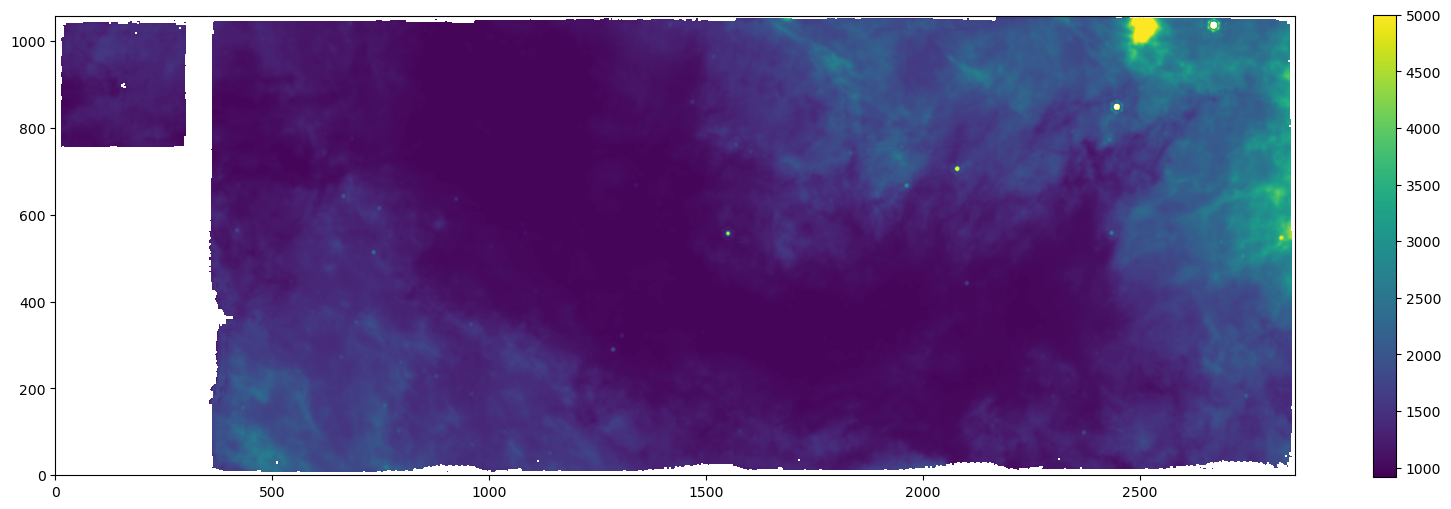

In [161]:
resamp = datamodels.open('step_ResampleStep_resamplestep.fits')
pl.figure(figsize=(20,6))
pl.imshow(resamp.data, origin='lower', vmax=5000); pl.colorbar();

In [162]:
sky.group_names

['jw02221002001_02101_1',
 'jw02221002001_02101_2',
 'jw02221002001_02101_3',
 'jw02221002001_02101_4',
 'jw02221002001_04101_1',
 'jw02221002001_04101_2',
 'jw02221002001_04101_3',
 'jw02221002001_04101_4',
 'jw02221002001_06101_1',
 'jw02221002001_06101_2',
 'jw02221002001_06101_3',
 'jw02221002001_06101_4',
 'jw02221002001_08101_1',
 'jw02221002001_08101_2',
 'jw02221002001_08101_3',
 'jw02221002001_08101_4',
 'jw02221002001_10101_1',
 'jw02221002001_10101_2',
 'jw02221002001_10101_3',
 'jw02221002001_10101_4',
 'jw02221002001_12101_1',
 'jw02221002001_12101_2',
 'jw02221002001_12101_3',
 'jw02221002001_12101_4',
 'jw02221002002_02101_1',
 'jw02221002002_02101_2',
 'jw02221002002_02101_3',
 'jw02221002002_02101_4',
 'jw02221002002_04101_1',
 'jw02221002002_04101_2',
 'jw02221002002_04101_3',
 'jw02221002002_04101_4',
 'jw02221002002_06101_1',
 'jw02221002002_06101_2',
 'jw02221002002_06101_3',
 'jw02221002002_06101_4',
 'jw02221002002_08101_1',
 'jw02221002002_08101_2',
 'jw02221002

In [163]:
outlier.group_names

['jw02221002001_02101_1',
 'jw02221002001_02101_2',
 'jw02221002001_02101_3',
 'jw02221002001_02101_4',
 'jw02221002001_04101_1',
 'jw02221002001_04101_2',
 'jw02221002001_04101_3',
 'jw02221002001_04101_4',
 'jw02221002001_06101_1',
 'jw02221002001_06101_2',
 'jw02221002001_06101_3',
 'jw02221002001_06101_4',
 'jw02221002001_08101_1',
 'jw02221002001_08101_2',
 'jw02221002001_08101_3',
 'jw02221002001_08101_4',
 'jw02221002001_10101_1',
 'jw02221002001_10101_2',
 'jw02221002001_10101_3',
 'jw02221002001_10101_4',
 'jw02221002001_12101_1',
 'jw02221002001_12101_2',
 'jw02221002001_12101_3',
 'jw02221002001_12101_4',
 'jw02221002002_02101_1',
 'jw02221002002_02101_2',
 'jw02221002002_02101_3',
 'jw02221002002_02101_4',
 'jw02221002002_04101_1',
 'jw02221002002_04101_2',
 'jw02221002002_04101_3',
 'jw02221002002_04101_4',
 'jw02221002002_06101_1',
 'jw02221002002_06101_2',
 'jw02221002002_06101_3',
 'jw02221002002_06101_4',
 'jw02221002002_08101_1',
 'jw02221002002_08101_2',
 'jw02221002

## Resamp outlier

In [164]:
print(ResampleStep.spec)

resample = ResampleStep()
resample.output_file = 'step_ResampleStep_resample_step_outlier.fits'
resample.save_results = True
resamp = resample.run(outlier)

2024-08-04 17:41:50,947 - stpipe.ResampleStep - INFO - ResampleStep instance created.



        pixfrac = float(min=0.0, max=1.0, default=1.0)  # Pixel shrinkage factor
        kernel = option('square','gaussian','point','turbo','lanczos2','lanczos3',default='square')  # Flux distribution kernel
        fillval = string(default='NAN')  # Output value for pixels with no weight or flux
        weight_type = option('ivm', 'exptime', None, default='ivm')  # Input image weighting type
        output_shape = int_list(min=2, max=2, default=None)  # [x, y] order
        crpix = float_list(min=2, max=2, default=None)
        crval = float_list(min=2, max=2, default=None)
        rotation = float(default=None)  # Output image Y-axis PA relative to North
        pixel_scale_ratio = float(default=1.0)  # Ratio of input to output pixel scale
        pixel_scale = float(default=None)  # Absolute pixel scale in arcsec
        output_wcs = string(default='')  # Custom output WCS
        single = boolean(default=False)  # Resample each input to its own output grid
        blendheaders = 

2024-08-04 17:41:51,534 - stpipe.ResampleStep - INFO - Step ResampleStep running with args (<ModelContainer>,).
2024-08-04 17:41:51,540 - stpipe.ResampleStep - INFO - Step ResampleStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline/step_ResampleStep_resample_step_outlier.fits
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  pixfrac: 1.0
  kernel: square
  fillval: NAN
  weight_type: ivm
  output_shape: None
  crpix: None
  crval: None
  rotation: None
  pixel_scale_ratio: 1.0
  pixel_scale: None
  output_wcs: ''
  single: False
  blendheaders: True
  allowed_memory: None
  in_memory: True
2024-08-04 17:41:51,548 - stpipe.ResampleStep - INFO - Driz parameter kernel: square
2024-08-04 17:41:51,548 - stpipe.ResampleStep - INFO - Driz parameter pixfrac: 1.0
2024-08-04 17:41:51,549 

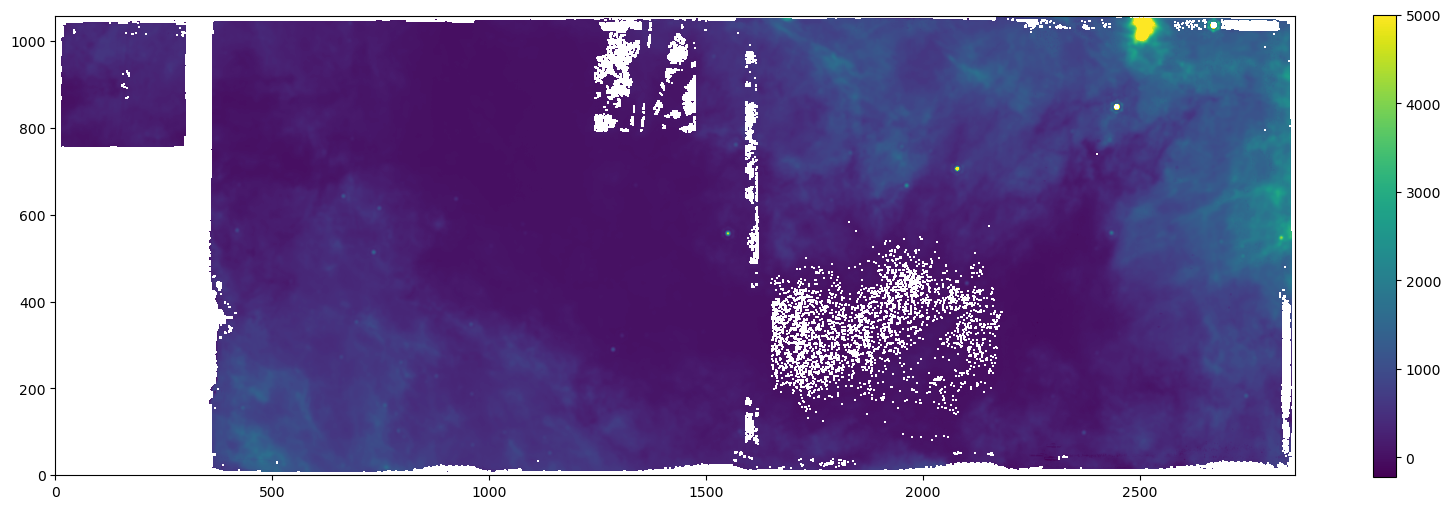

In [166]:
resamp = datamodels.open(resamp.meta.filename)
pl.figure(figsize=(20,6))
pl.imshow(resamp.data, origin='lower', vmax=5000); pl.colorbar();

In [167]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline'

## Resamp sky

In [168]:
print(ResampleStep.spec)

resample = ResampleStep()
resample.output_file = 'step_ResampleStep_resample_step_sky.fits'
resample.save_results = True
resamp = resample.run(sky)

2024-08-04 17:45:12,408 - stpipe.ResampleStep - INFO - ResampleStep instance created.



        pixfrac = float(min=0.0, max=1.0, default=1.0)  # Pixel shrinkage factor
        kernel = option('square','gaussian','point','turbo','lanczos2','lanczos3',default='square')  # Flux distribution kernel
        fillval = string(default='NAN')  # Output value for pixels with no weight or flux
        weight_type = option('ivm', 'exptime', None, default='ivm')  # Input image weighting type
        output_shape = int_list(min=2, max=2, default=None)  # [x, y] order
        crpix = float_list(min=2, max=2, default=None)
        crval = float_list(min=2, max=2, default=None)
        rotation = float(default=None)  # Output image Y-axis PA relative to North
        pixel_scale_ratio = float(default=1.0)  # Ratio of input to output pixel scale
        pixel_scale = float(default=None)  # Absolute pixel scale in arcsec
        output_wcs = string(default='')  # Custom output WCS
        single = boolean(default=False)  # Resample each input to its own output grid
        blendheaders = 

2024-08-04 17:45:12,942 - stpipe.ResampleStep - INFO - Step ResampleStep running with args (<ModelContainer>,).
2024-08-04 17:45:12,946 - stpipe.ResampleStep - INFO - Step ResampleStep parameters are:
  pre_hooks: []
  post_hooks: []
  output_file: /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline/step_ResampleStep_resample_step_sky.fits
  output_dir: None
  output_ext: .fits
  output_use_model: False
  output_use_index: True
  save_results: True
  skip: False
  suffix: None
  search_output_file: True
  input_dir: ''
  pixfrac: 1.0
  kernel: square
  fillval: NAN
  weight_type: ivm
  output_shape: None
  crpix: None
  crval: None
  rotation: None
  pixel_scale_ratio: 1.0
  pixel_scale: None
  output_wcs: ''
  single: False
  blendheaders: True
  allowed_memory: None
  in_memory: True
2024-08-04 17:45:12,972 - stpipe.ResampleStep - INFO - Driz parameter kernel: square
2024-08-04 17:45:12,973 - stpipe.ResampleStep - INFO - Driz parameter pixfrac: 1.0
2024-08-04 17:45:12,973 - st

In [169]:
resamp.meta.filename

'step_ResampleStep_resample_step_sky_resamplestep.fits'

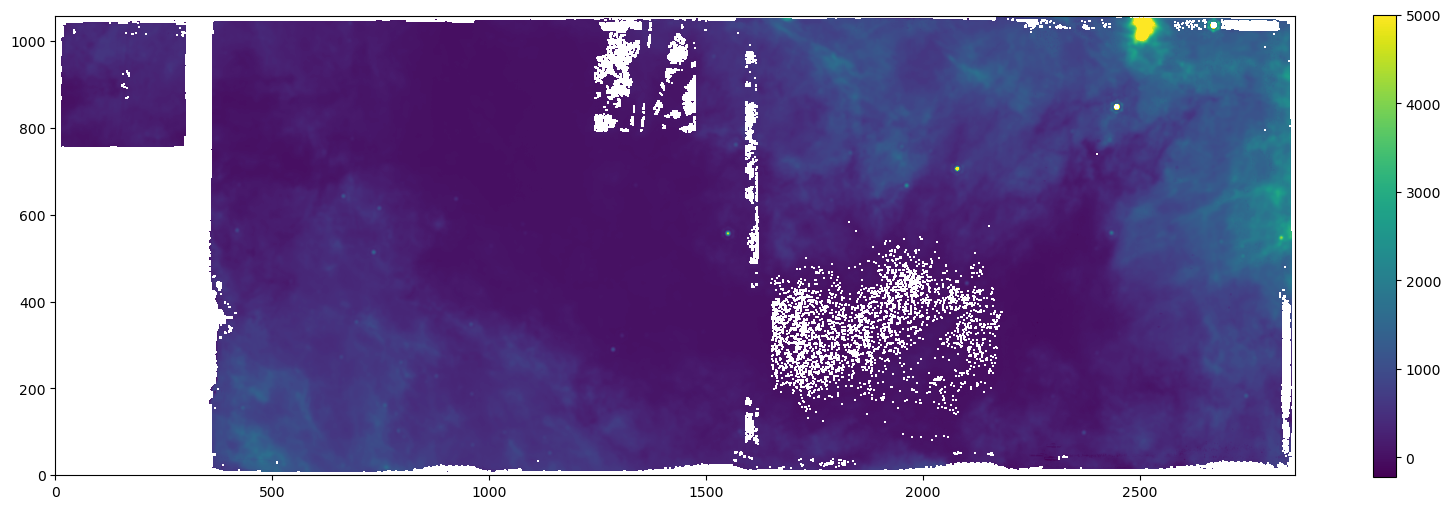

In [170]:
resamp_data = datamodels.open('step_ResampleStep_resample_step_sky_resamplestep.fits')
pl.figure(figsize=(20,6))
pl.imshow(resamp_data.data, origin='lower', vmax=5000); pl.colorbar();

In [ ]:
merged = datamodels.open('jw02221-o002_t001_miri_f2550w_i2d.fits')

In [ ]:
pl.figure(figsize=(20,6))
pl.imshow(merged.data, origin='lower', vmax=5000); pl.colorbar();

In [ ]:
for fn in glob.glob("*skymatch.fits"):
    datamod = datamodels.open(fn)
    pl.hist(datamod.data.ravel(), bins=np.linspace(-100, 5000), histtype='step');

# Image3 

In [171]:
from jwst.pipeline import calwebb_image3

In [172]:
asn_file_each =  (f'{basepath}/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json')

In [173]:
print("Running tweakreg")
calwebb_image3.Image3Pipeline.call(
    asn_file_each,
    steps={#'tweakreg': tweakreg_parameters,
           # Skip skymatch: looks like it causes problems (but maybe not doing this is worse?)
           'skymatch': {'save_results': True,
                        'subtract': False,
                        'skymethod': 'match', 'match_down': False},
           # MIRI ticket https://stsci.service-now.com/jwst?id=ticket&table=incident&sys_id=aa4172264715b510ec5b9448436d43ae recommends modifying snr & good_bits
           # https://jwst-pipeline.readthedocs.io/en/latest/jwst/outlier_detection/arguments.html
           'outlier_detection': {'snr': (7.0, 5.0),
                                 # https://jwst-pipeline.readthedocs.io/en/stable/jwst/references_general/references_general.html#data-quality-flags
                                 'good_bits': "SATURATED, JUMP_DET",
                                 },
    },
    output_dir=f'{basepath}/F2550W/pipeline/',
    save_results=True)
print(f"DONE running {asn_file_each}")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3129819442.py, line 16)

In [181]:
mkdir /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline_skymatch_outlier

In [182]:
mkdir /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline_skymatch

In [183]:
mkdir /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline_outlier

In [184]:

for skymatch in (True, False):
    for outlier in (True, False):
        
        print("Running tweakreg")
        calwebb_image3.Image3Pipeline.call(
            asn_file_each,
            steps={#'tweakreg': tweakreg_parameters,
                   # Skip skymatch: looks like it causes problems (but maybe not doing this is worse?)
                   'skymatch': {'save_results': True,
                                'subtract': False,
                                'skymethod': 'match', 'match_down': False},
                   # MIRI ticket https://stsci.service-now.com/jwst?id=ticket&table=incident&sys_id=aa4172264715b510ec5b9448436d43ae recommends modifying snr & good_bits
                   # https://jwst-pipeline.readthedocs.io/en/latest/jwst/outlier_detection/arguments.html
                   'outlier_detection': {'snr': '7.0 5.0',
                                         # https://jwst-pipeline.readthedocs.io/en/stable/jwst/references_general/references_general.html#data-quality-flags
                                         'good_bits': "SATURATED, JUMP_DET",
                                         },
            },
            output_dir=f'{basepath}/F2550W/pipeline{"_skymatch" if skymatch else ""}{"_outlier" if outlier else ""}/',
            save_results=True)
        print(f"DONE running {asn_file_each}")

Running tweakreg


2024-08-04 18:09:21,185 - stpipe - INFO - PARS-TWEAKREGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-tweakregstep_0018.asdf
2024-08-04 18:09:21,504 - stpipe - INFO - PARS-OUTLIERDETECTIONSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-outlierdetectionstep_0056.asdf
2024-08-04 18:09:21,608 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-resamplestep_0001.asdf
2024-08-04 18:09:21,767 - stpipe - INFO - PARS-SOURCECATALOGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-sourcecatalogstep_0015.asdf
2024-08-04 18:09:21,952 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2024-08-04 18:09:21,966 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2024-08-04 18:09:21,969 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep insta

DONE running /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json
Running tweakreg


2024-08-04 18:21:33,382 - stpipe - INFO - PARS-TWEAKREGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-tweakregstep_0018.asdf
2024-08-04 18:21:33,486 - stpipe - INFO - PARS-OUTLIERDETECTIONSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-outlierdetectionstep_0056.asdf
2024-08-04 18:21:33,511 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-resamplestep_0001.asdf
2024-08-04 18:21:33,538 - stpipe - INFO - PARS-SOURCECATALOGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-sourcecatalogstep_0015.asdf
2024-08-04 18:21:33,582 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2024-08-04 18:21:33,583 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2024-08-04 18:21:33,585 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep insta

DONE running /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json
Running tweakreg


2024-08-04 18:31:58,945 - stpipe - INFO - PARS-TWEAKREGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-tweakregstep_0018.asdf
2024-08-04 18:31:59,011 - stpipe - INFO - PARS-OUTLIERDETECTIONSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-outlierdetectionstep_0056.asdf
2024-08-04 18:31:59,047 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-resamplestep_0001.asdf
2024-08-04 18:31:59,057 - stpipe - INFO - PARS-SOURCECATALOGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-sourcecatalogstep_0015.asdf
2024-08-04 18:31:59,073 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2024-08-04 18:31:59,074 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2024-08-04 18:31:59,076 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep insta

DONE running /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json
Running tweakreg


2024-08-04 18:42:11,752 - stpipe - INFO - PARS-TWEAKREGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-tweakregstep_0018.asdf
2024-08-04 18:42:11,804 - stpipe - INFO - PARS-OUTLIERDETECTIONSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-outlierdetectionstep_0056.asdf
2024-08-04 18:42:11,849 - stpipe - INFO - PARS-RESAMPLESTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-resamplestep_0001.asdf
2024-08-04 18:42:11,863 - stpipe - INFO - PARS-SOURCECATALOGSTEP parameters found: /orange/adamginsburg/jwst/brick/crds/references/jwst/miri/jwst_miri_pars-sourcecatalogstep_0015.asdf
2024-08-04 18:42:11,892 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2024-08-04 18:42:11,893 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2024-08-04 18:42:11,895 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep insta

DONE running /blue/adamginsburg/adamginsburg/jwst/brick/F2550W/pipeline/jw02221-o002_20240708t040837_image3_00007_asn.json
